In [43]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import datetime
%matplotlib inline

In [44]:
conn = psycopg2.connect(host="localhost",database="ais_data")
c = conn.cursor()
if c:
    print('Connection is good.')
c.close()

Connection is good.


In [45]:
c = conn.cursor()
df_trips = pd.read_sql('select * from ship_trips', conn)
c.close()

In [46]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20731 entries, 0 to 20730
Data columns (total 7 columns):
mmsi              20731 non-null object
position_count    20731 non-null int64
line              20731 non-null object
line_length_km    20731 non-null float64
first_date        20731 non-null datetime64[ns]
last_date         20731 non-null datetime64[ns]
time_diff         20731 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 1.1+ MB


In [47]:
df_trips.describe()

,position_count,line_length_km,time_diff
count,20731.000000,2.073100e+04,20731
mean,6548.296320,2.305901e+03,16 days 09:57:47.302252
std,9321.554957,1.285492e+05,12 days 02:05:12.115078
min,1.000000,0.000000e+00,0 days 00:00:00
25%,246.500000,2.338773e+01,3 days 11:46:00
50%,2262.000000,2.047657e+02,17 days 05:47:54
75%,9761.000000,1.030019e+03,29 days 08:48:32
max,41916.000000,1.735623e+07,30 days 23:59:59


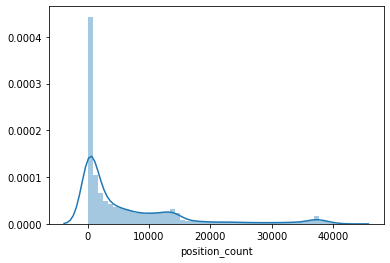

In [48]:
sns.distplot(df_trips['position_count'])

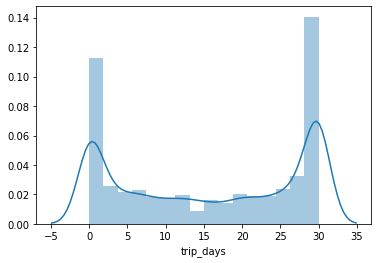

In [49]:
df_trips['trip_days'] = df_trips['time_diff'].dt.days
sns.distplot(df_trips['trip_days'])

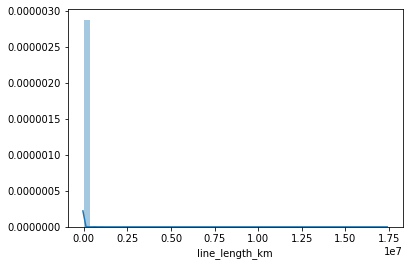

In [51]:
sns.distplot(df_trips['line_length_km'])

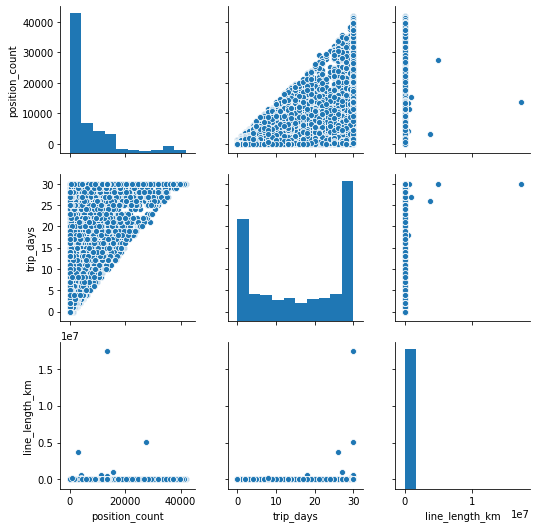

In [61]:
g = sns.pairplot(df_trips, vars=['position_count', 'trip_days', 'line_length_km'])
